# Name: Anushree A Yadwad
## Task:Color Identification in Images
## Domain:IOT & Computer Vision

In [1]:
#We are Importing basic libraries such as numpy.To use OpenCV we import cv2 library.We also import KMeans algorithm which is part of sklearn's cluster package.
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


The type of this input is <class 'numpy.ndarray'>
Shape: (2160, 3840, 3)


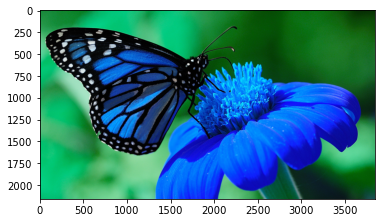

In [3]:
#To read image we use the method cv2.imread() and plot the image using imshow()
img=cv2.imread('butterfly.jpg')
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))
plt.imshow(img)

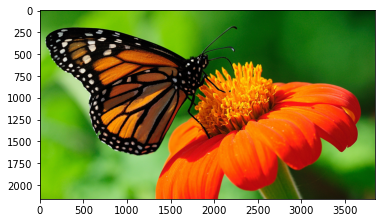

In [4]:
#By default, OpenCV reads the image in Blue-Green-Red(BGR) Sequence. We convert it to RGB to get the original image.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

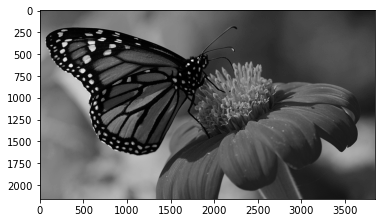

In [5]:
#Coverting RGB image to Grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

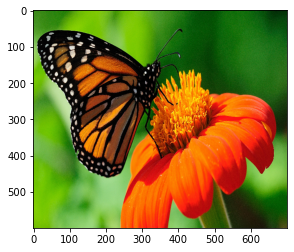

In [6]:
#Resizing the image
resized_img = cv2.resize(img, (700, 600))
plt.imshow(resized_img)

In [7]:
#RGB to HEX Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
#Getting the colors ofthe image and displaying it in a pie-chart
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
#KMeans algorithm creates clusters based on the supplied count of clusters.In our case, it will form clusters of colors and these clusters will be our top colors. 
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([175.98406699,  25.01447927,  12.14485085]),
 array([25.80317923, 99.0702758 , 13.44155529]),
 array([247.33449357, 128.01386532,   9.93498835]),
 array([103.42779868, 179.55298683,  25.77888053]),
 array([15.22102048, 14.21085933,  6.91883552]),
 array([146.92660764, 198.03932898, 110.44035415]),
 array([110.30730479,  61.19803935,  31.20382599]),
 array([243.13866639,  59.99586756,  12.20065303])]

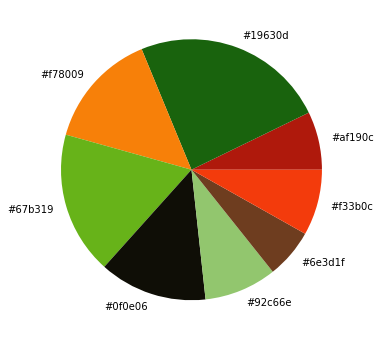

In [10]:
#Pie-Chart will display top 8 colors of the image
get_colors(get_image('butterfly.jpg'), 8, True)

In [11]:
IMAGE_DIRECTORY = r'C:\Users\Anushree\Documents\The Sparks Foundation\images'
COLORS = {
    'WHITE' : [255,255,255],
    'PINK': [227,0,235],
    'RED': [255,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

#to get the list of all files and directories in the specified directory.
for file in os.listdir(IMAGE_DIRECTORY):
    images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
#We define COLORS as a dictionary of colors.Then, we read all images in that folder and save their values in the images array.

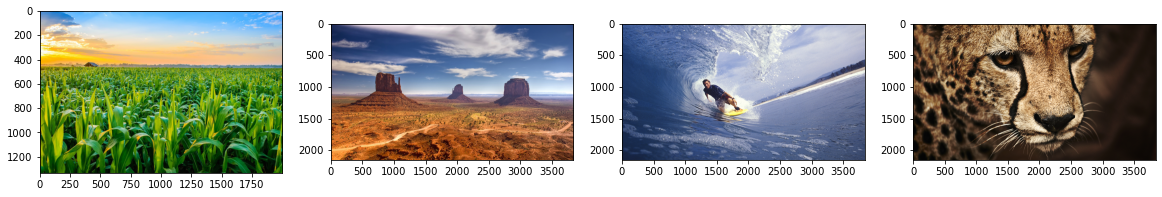

In [12]:
#The method takes the arguments as number of rows = 1, number of columns = all images 
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [13]:
#This function match_image_by_color filters all images that match the selected color.It extracts the image colors using our previously defined method get_colors in RGB format. We use the method rgb2lab to convert the selected color to a format we can compare. The for loop simply iterates over all the colors retrieved from the image.
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [14]:
#We define a function show_selected_images that iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow.
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

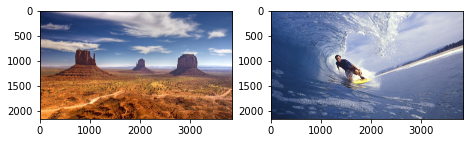

In [15]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'], 60, 5)